In [58]:
# 초기 파일세팅 
# input / output 파일 생성
import os

# 폴더 생성 (기존재시 pass)
os.makedirs('./input',  exist_ok=True)
os.makedirs('./output', exist_ok=True)

### Data Fields

- datetime - hourly date + timestamp  
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather
   - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
   - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
   - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
   - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

#### 분류와 회귀중 회귀와 관련된 문제 -> 자전거 대여량을 예측하는 문제이기 때문


In [59]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from scipy import stats

#노트북안에 그래프 그리기 위함
%matplotlib inline
# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일로
plt.style.use('ggplot')
# 그래프에서 마이너스 폰트 깨지지 않기 위함
mpl.rcParams['axes.unicode_minus'] = False
rc('font', family='AppleGothic')

In [60]:
df_train  = pd.read_csv('input/train.csv', parse_dates=["datetime"]) # train파일의 datatime 형식으로 불러온다
df_train.shape

(10886, 12)

In [61]:
# df_train.columns
df_train.dtypes


datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [62]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [63]:
df_train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [64]:
df_train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

<Axes: >

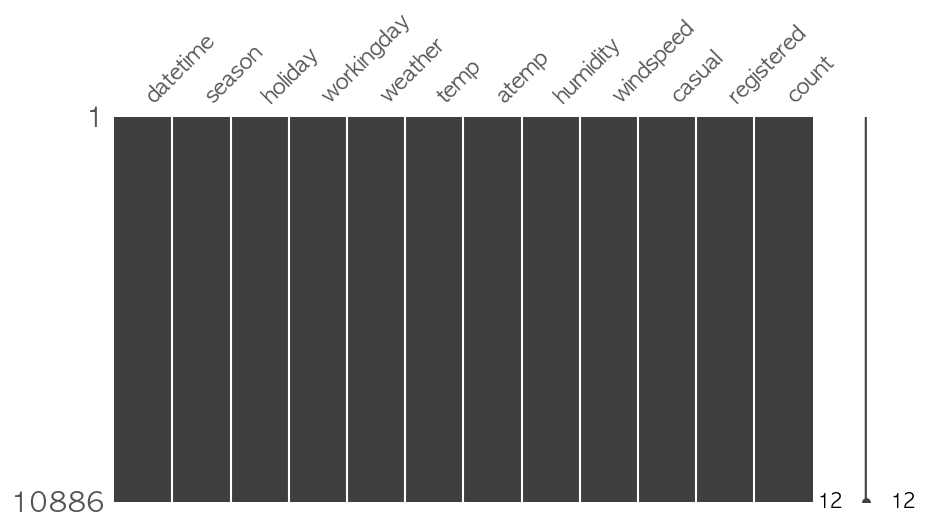

In [65]:
import missingno as msno

msno.matrix(df_train, figsize=(10,5))

In [66]:
df_train['year'] = df_train['datetime'].dt.year
df_train['month'] = df_train['datetime'].dt.month
df_train['day'] = df_train['datetime'].dt.day
df_train['hour'] = df_train['datetime'].dt.hour
df_train['minute'] = df_train['datetime'].dt.minute
df_train['second'] = df_train['datetime'].dt.second

In [67]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


[Text(0, 0.5, 'hour'), Text(0.5, 1.0, '시간별 대여량')]

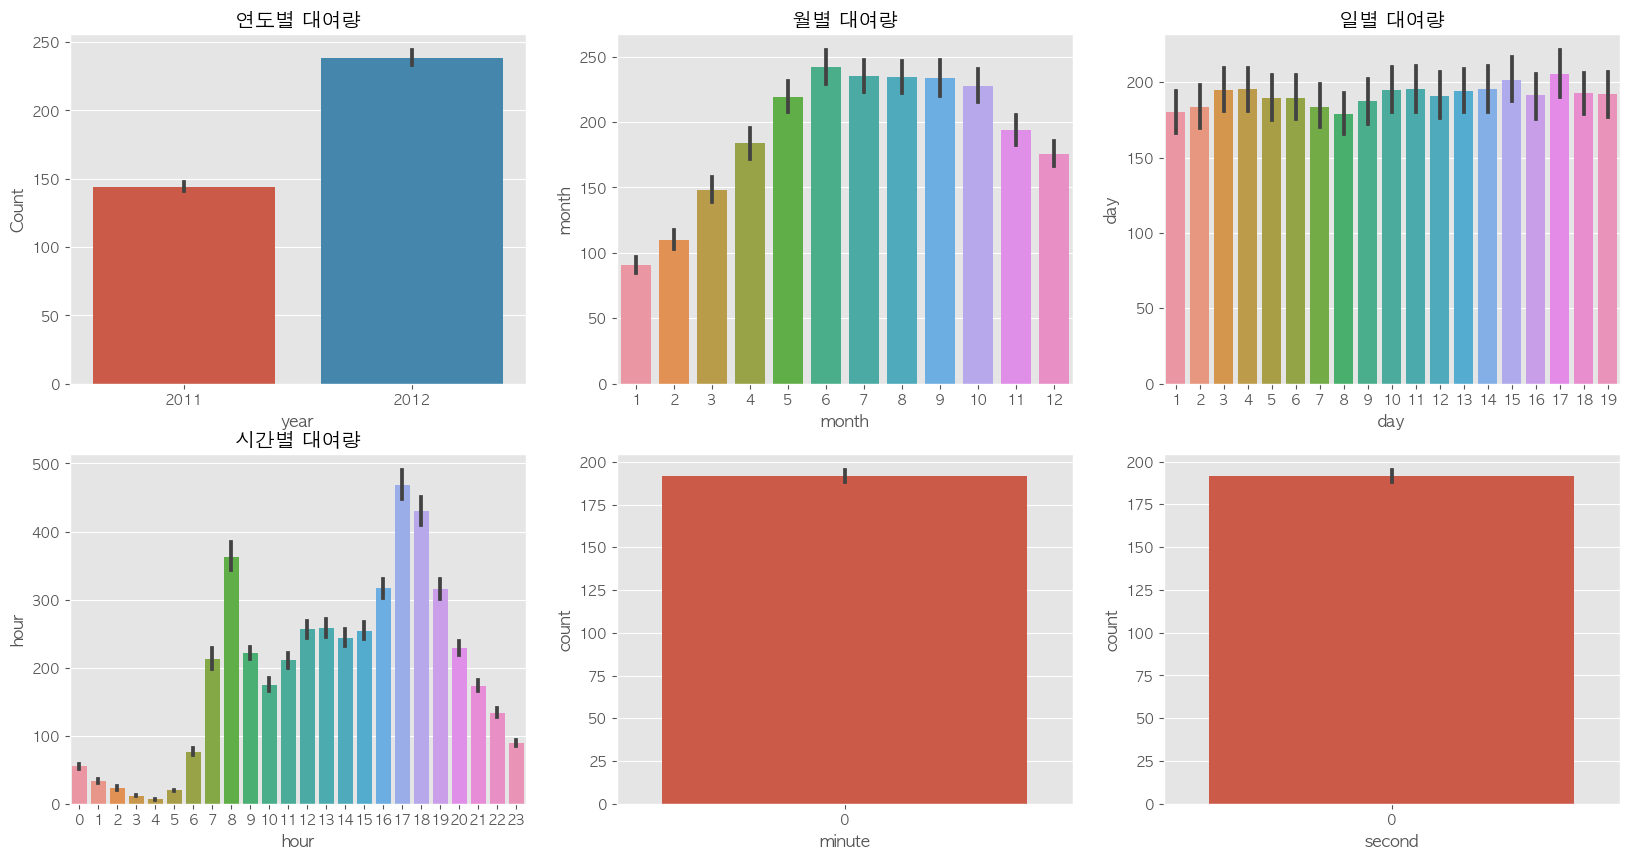

In [68]:
# 6개의 figure
figure, ((ax1, ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(20,10)

sns.barplot(data=df_train, x='year', y='count', ax=ax1)
sns.barplot(data=df_train, x='month', y='count', ax=ax2)
sns.barplot(data=df_train, x='day', y='count', ax=ax3)
sns.barplot(data=df_train, x='hour', y='count', ax=ax4)
sns.barplot(data=df_train, x='minute', y='count', ax=ax5)
sns.barplot(data=df_train, x='second', y='count', ax=ax6)

ax1.set(ylabel='Count', title='연도별 대여량')
ax2.set(ylabel='month', title='월별 대여량')
ax3.set(ylabel='day', title='일별 대여량')
ax4.set(ylabel='hour', title='시간별 대여량')

- 연도별 대여량은 2012년보다 2011 더 많다
- 월별 대여량은 6월에 가장 많고, 7~10월 대여량도 많다
- 일별 대여량은 1~19일까지만 있고, 나머지 날짜는 test.csv에 있음 -> 피처로 사용 X
- 시간 대 대여량을 보면 출퇴근 시간에 대여량이 많은 것 같다. 하지만 주말과 나누어 볼 필요가 있을 것 같다
- 분, 초도 다 0이기때문에 의미가 없다.

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, '근무일 여부에 따른 대여량')]

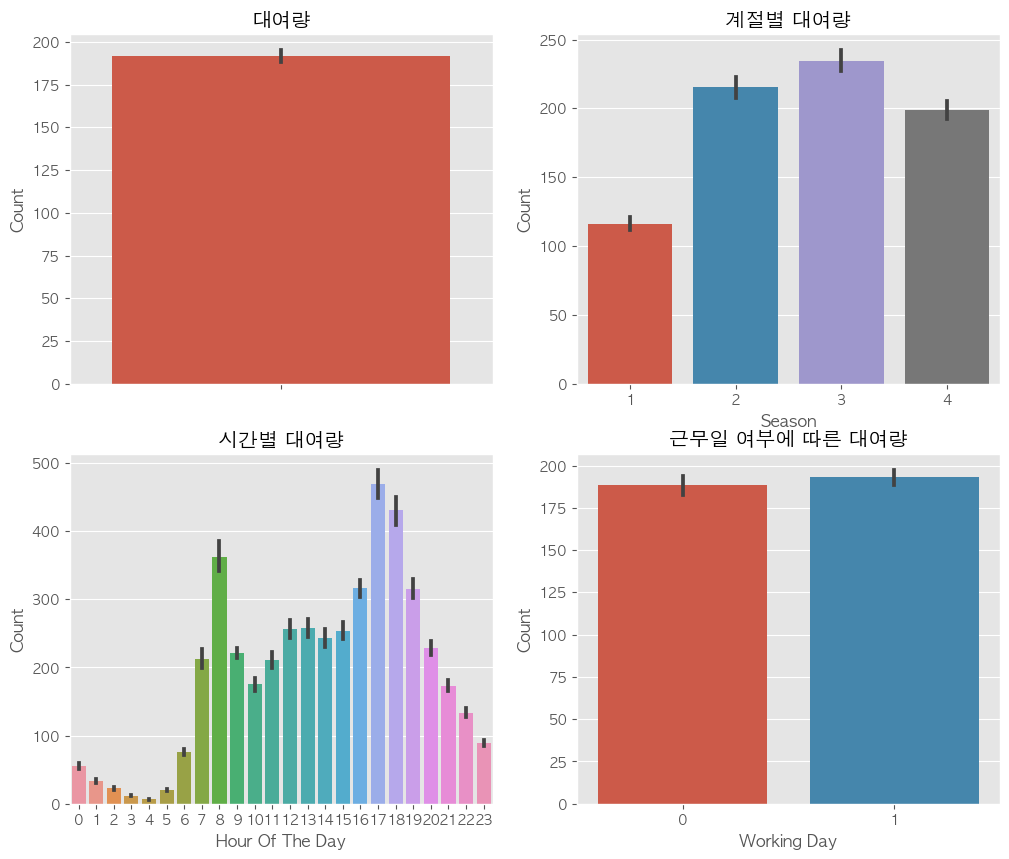

In [69]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12,10)

sns.barplot(data=df_train, y="count", orient="v", ax=axes[0][0]) # v는 수직바, 0,0은 왼쪽위(첫번째)
sns.barplot(data=df_train, y="count", x="season", ax=axes[0][1])
sns.barplot(data=df_train, y="count", x="hour", ax=axes[1][0])
sns.barplot(data=df_train, y="count", x="workingday", ax=axes[1][1])

axes[0][0].set(ylabel="Count", title='대여량')
axes[0][1].set(xlabel='Season', ylabel="Count", title='계절별 대여량')
axes[1][0].set(xlabel='Hour Of The Day', ylabel="Count", title='시간별 대여량')
axes[1][1].set(xlabel='Working Day', ylabel="Count", title='근무일 여부에 따른 대여량')

In [70]:
df_train['dayofweek'] = df_train['datetime'].dt.day_of_week
df_train.shape

(10886, 19)

In [71]:
df_train['dayofweek'].value_counts()

5    1584
6    1579
3    1553
0    1551
2    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

<Axes: xlabel='hour', ylabel='count'>

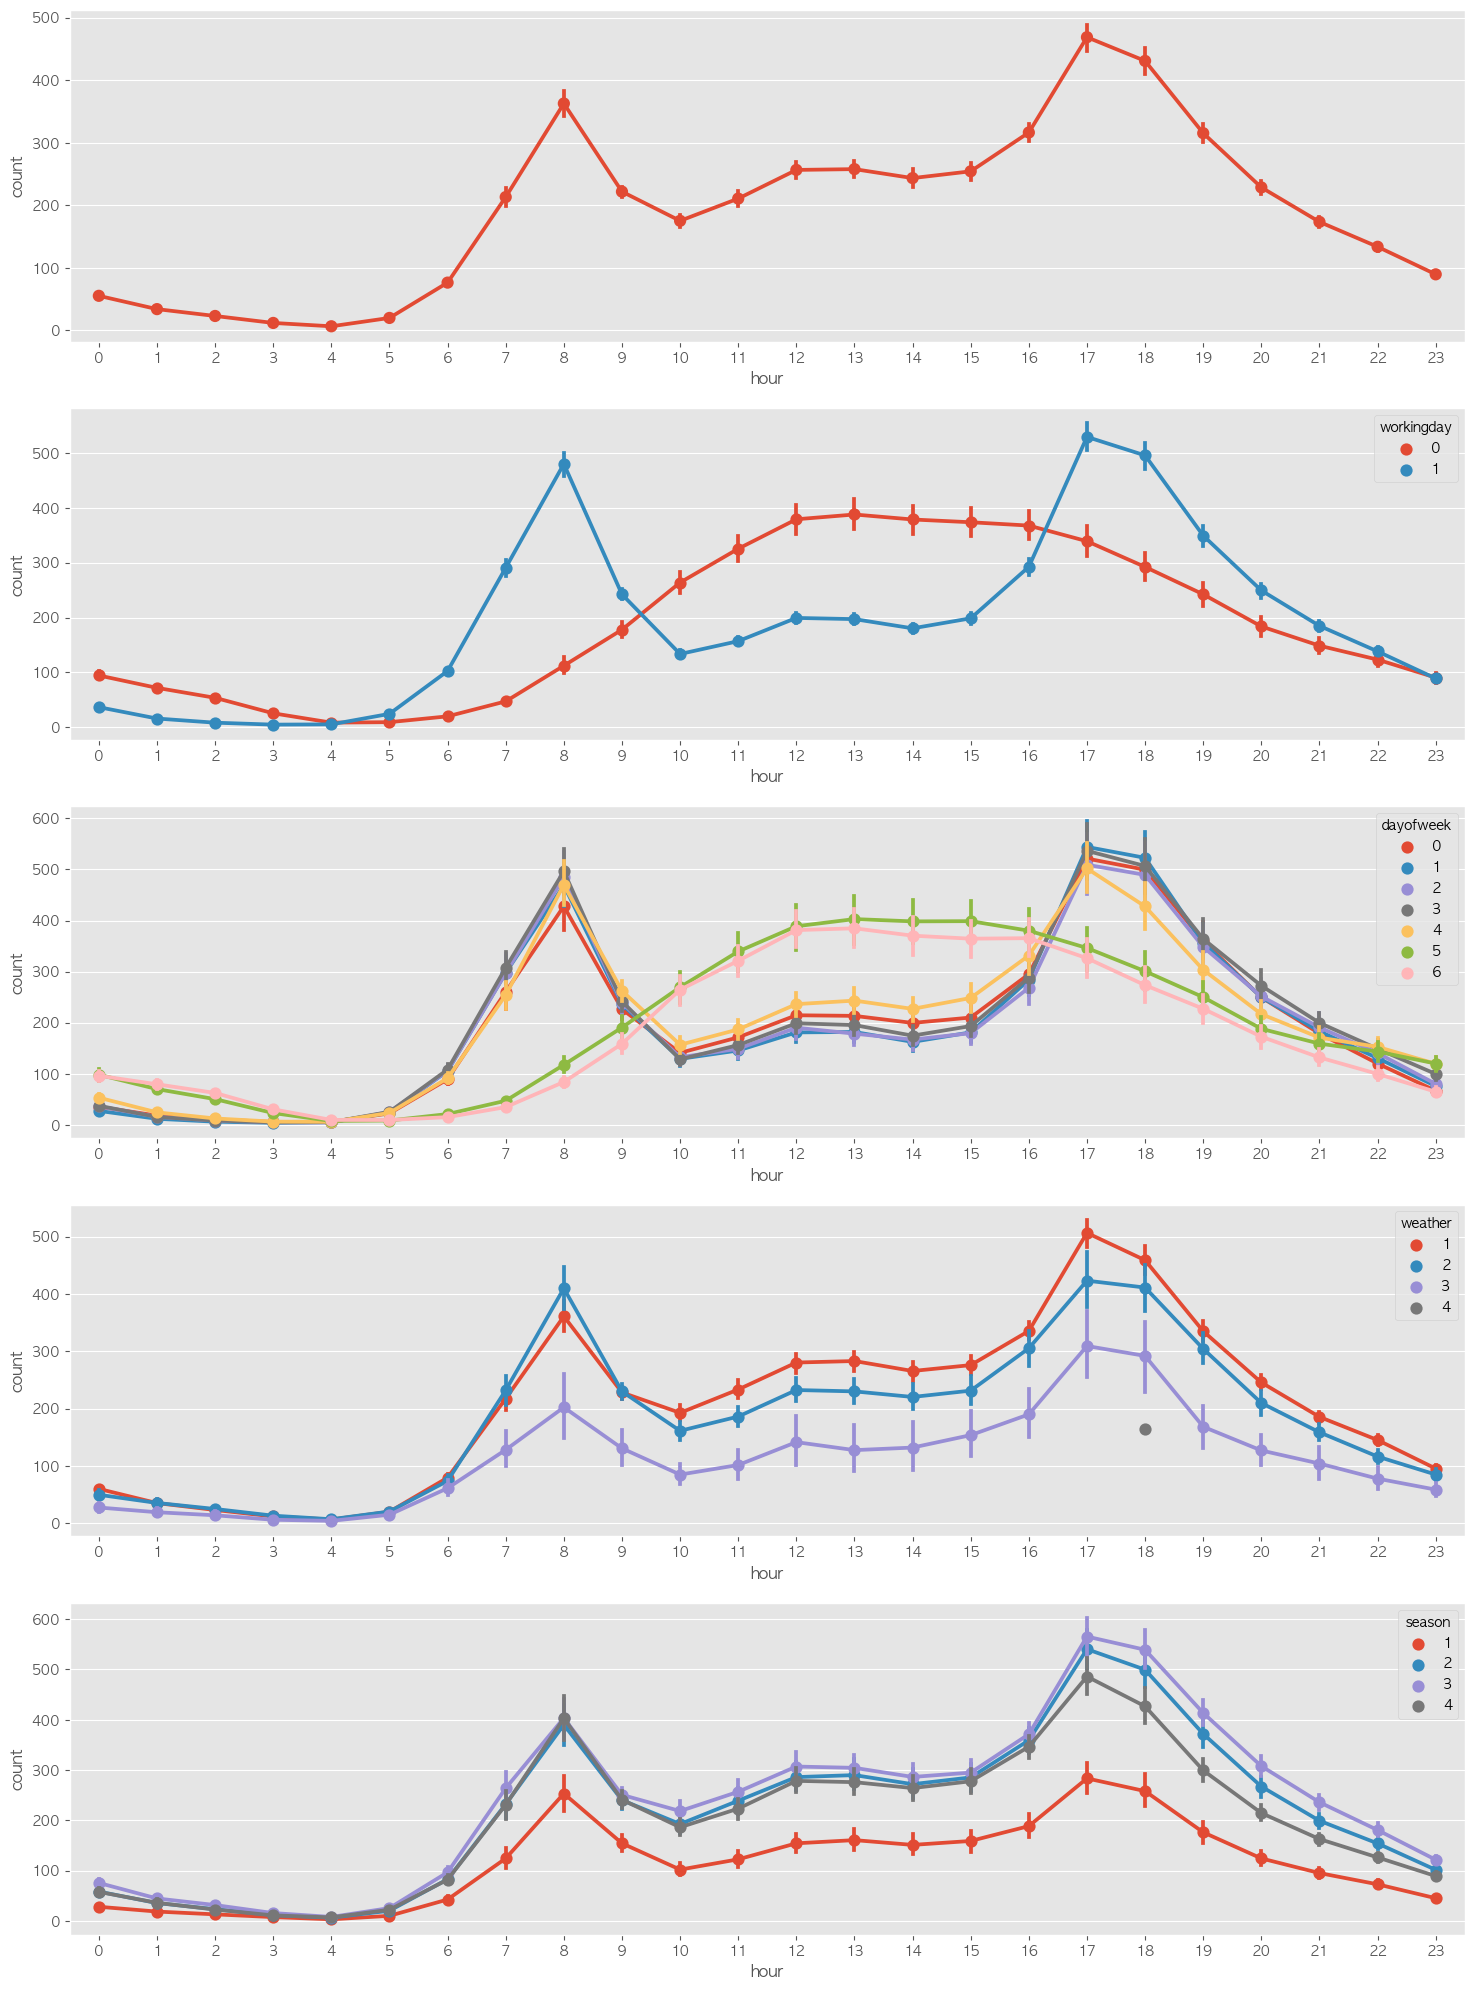

In [73]:
fig, (ax1,ax2,ax3,ax4,ax5)= plt.subplots(nrows=5)
fig.set_size_inches(18,25)

# workingday, dayofweek, weather, season
# pointplot -> 시간대별 데이터
sns.pointplot(data=df_train, x="hour", y="count", ax=ax1)
sns.pointplot(data=df_train,x="hour",y="count",hue="workingday",ax= ax2)
sns.pointplot(data=df_train,x="hour", y="count", hue="dayofweek",ax= ax3)
sns.pointplot(data=df_train,x="hour", y="count", hue="weather",ax= ax4)
sns.pointplot(data=df_train,x="hour", y="count", hue="season",ax= ax5)

corrMatt을 통해 기상상태, 등록여부도 영향을 미치는지 알아보고 heatMap으로 표현해보자!

In [75]:
corrMatt=  df_train[["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]]
corrMatt = corrMatt.corr()

print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

                temp     atemp    casual  registered  humidity  windspeed  \
temp        1.000000  0.984948  0.467097    0.318571 -0.064949  -0.017852   
atemp       0.984948  1.000000  0.462067    0.314635 -0.043536  -0.057473   
casual      0.467097  0.462067  1.000000    0.497250 -0.348187   0.092276   
registered  0.318571  0.314635  0.497250    1.000000 -0.265458   0.091052   
humidity   -0.064949 -0.043536 -0.348187   -0.265458  1.000000  -0.318607   
windspeed  -0.017852 -0.057473  0.092276    0.091052 -0.318607   1.000000   
count       0.394454  0.389784  0.690414    0.970948 -0.317371   0.101369   

               count  
temp        0.394454  
atemp       0.389784  
casual      0.690414  
registered  0.970948  
humidity   -0.317371  
windspeed   0.101369  
count       1.000000  


<Axes: >

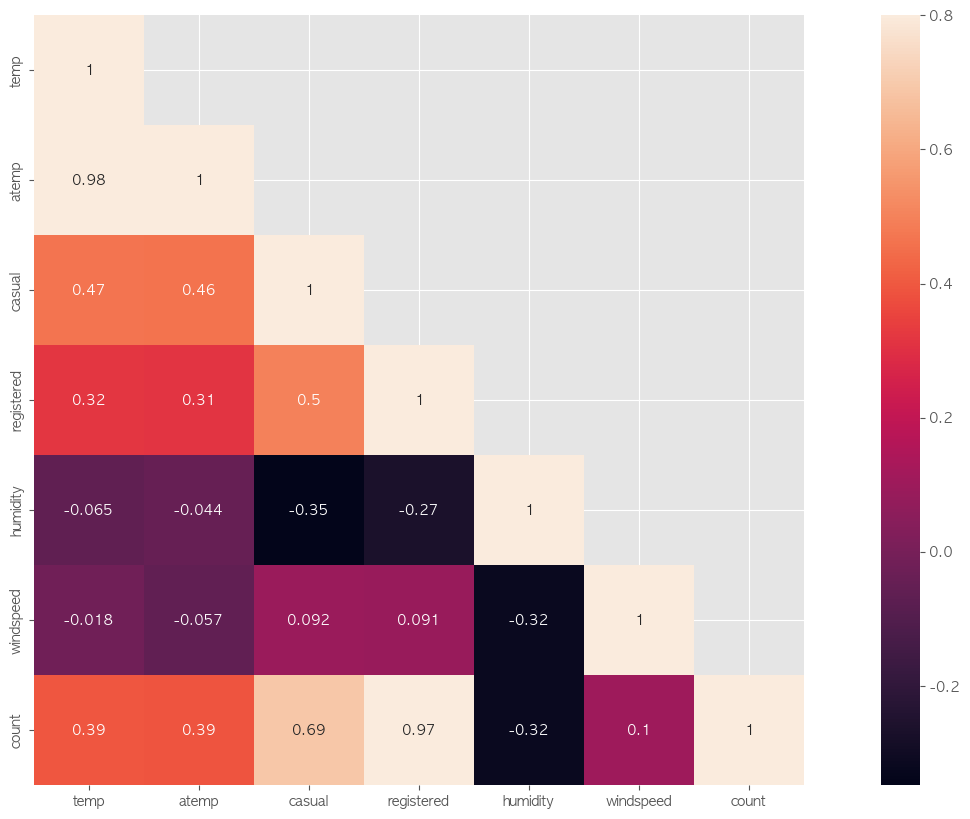

In [76]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask, vmax=.8,square=True, annot=True)

- 온도, 습도, 풍속은 거의 연관관계가 없다
- 대여량과 가장 연관이 높은 건 registered(0.97)로, 등록된 대여자가 많지만, test 데이터에는 이 값이 없다
- atemp, temp는 0.98로 상관관계가 높지만 온도, 체감온도를 피처로 사용하기엔 부적합함

<Axes: xlabel='humidity', ylabel='count'>

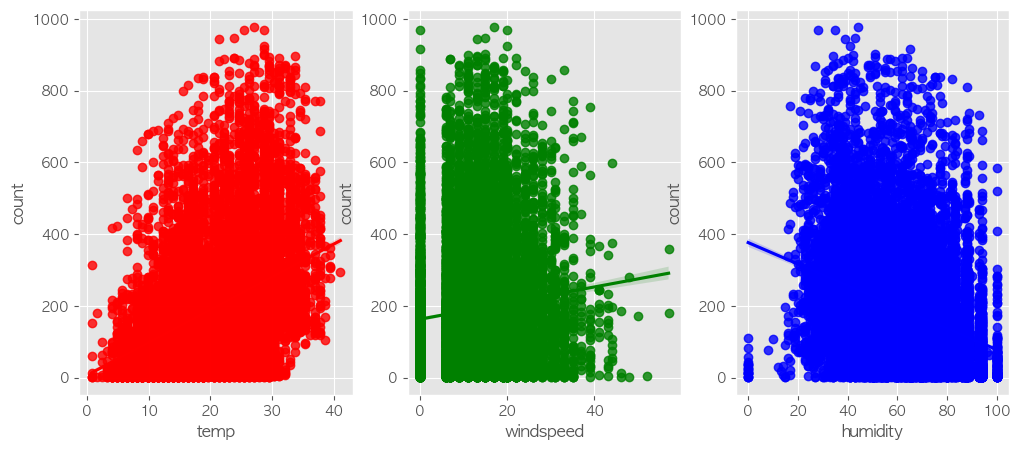

In [79]:
fig, axes = plt.subplots(ncols=3)
fig.set_size_inches(12,5)
colors = ['red', 'green', 'blue']
sns.regplot(x="temp", y="count", data=df_train, ax=axes[0], color=colors[0])
sns.regplot(x="windspeed", y="count", data=df_train, ax=axes[1], color=colors[1])
sns.regplot(x="humidity", y="count", data=df_train, ax=axes[2], color=colors[2])

풍속의 경우 0에 숫자가 몰려 있는 것으로 보인다. 아마도 관측 X 수치에 대해 0으로 기록했을 것(추측)

In [80]:
# 연-월로 보기위함 
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

df_train["year_month"] = df_train["datetime"].apply(concatenate_year_month)

print(df_train.shape)
df_train[["datetime", "year_month"]].head()

(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


<Axes: xlabel='year_month', ylabel='count'>

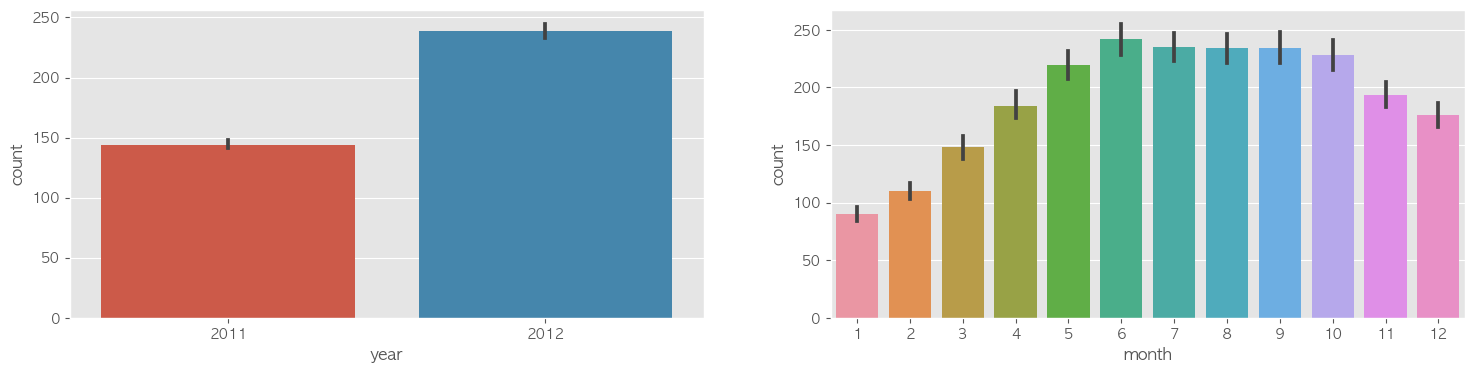

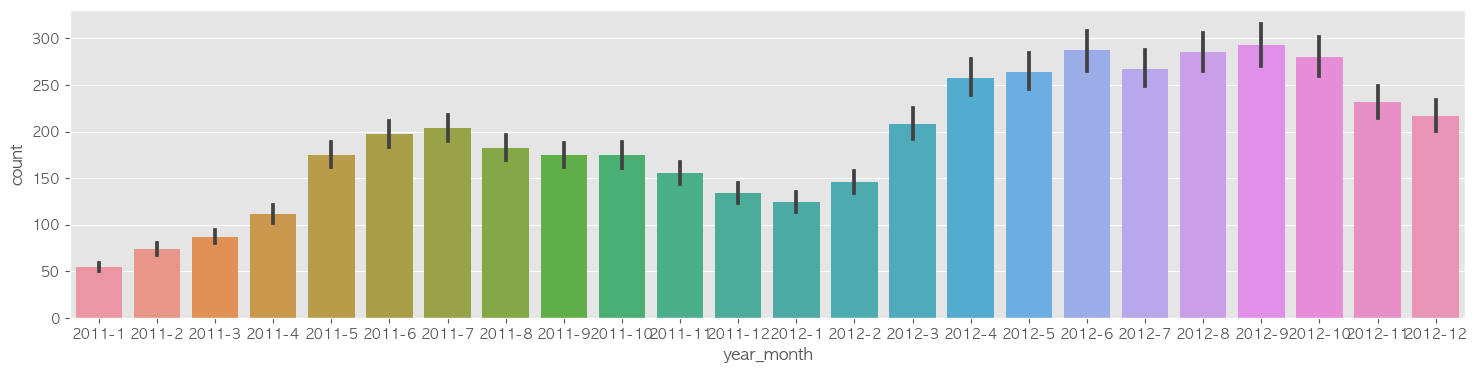

In [82]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18,4)

sns.barplot(data=df_train, x="year", y="count", ax=ax1)
sns.barplot(data=df_train, x="month", y="count", ax=ax2)

fig,ax3 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18,4)

sns.barplot(data=df_train, x= "year_month", y="count",ax=ax3)

- 2011년보다 2012년의 대여량이 더 많다
- 겨울보다는 여름에 대여랑이 많다
- 2011년과 2012년의 월별 데이터를 이어보면 전체적으로 증가하는 추세이다

In [90]:
# trainWithoutOutliers => 표준 편차의 3배 범위 내에 있는 데이터를 정상 범위로 간주
trainWithoutOutliers = df_train[np.abs(df_train["count"] - df_train["count"].mean()) <= (3*df_train["count"].std())]

print(df_train.shape)
print(trainWithoutOutliers.shape)

(10886, 20)
(10739, 20)


((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.59850903,
         6.5998705 ])),
 (1.3486990121229772, 4.562423868087808, 0.958117678090961))

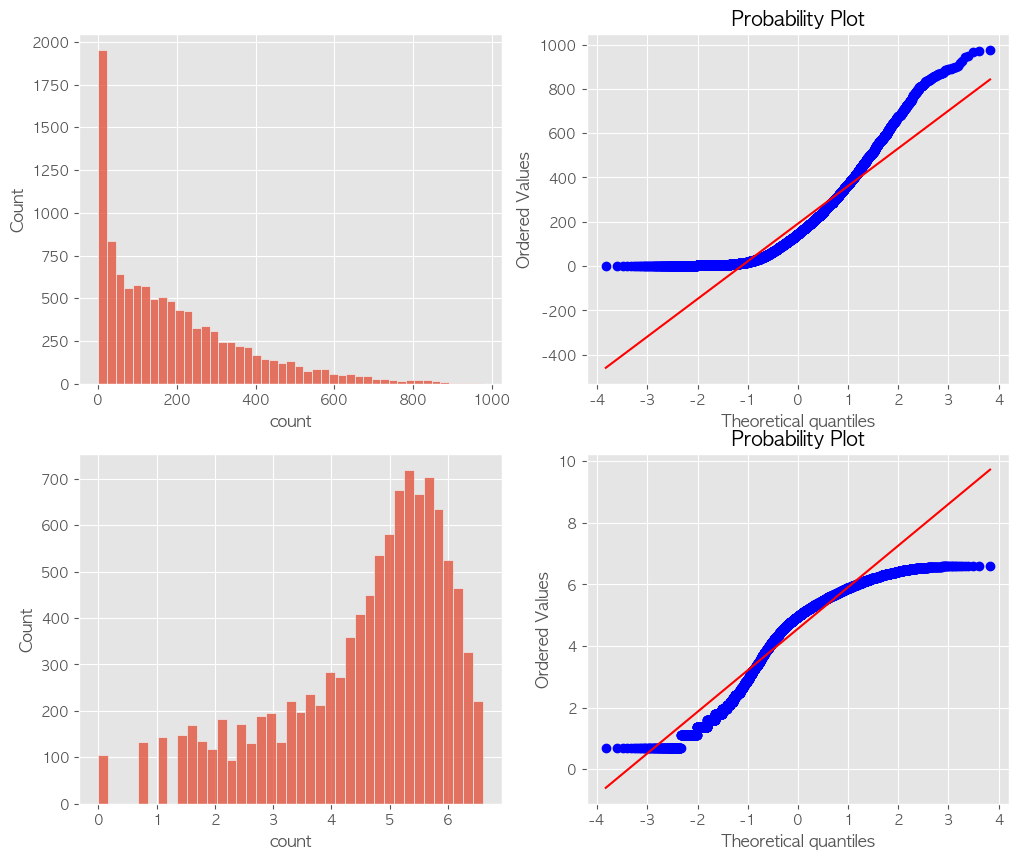

In [94]:
# count값의 데이터 분포도 파악 => histplot(distplot)과 probplot
 
figure, axes= plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(12,10)

sns.histplot(df_train["count"], ax=axes[0][0])
stats.probplot(df_train["count"], dist='norm', fit=True, plot=axes[0][1])
sns.histplot(np.log(trainWithoutOutliers["count"]), ax=axes[1][0])
stats.probplot(np.log1p(trainWithoutOutliers["count"]), dist='norm', fit=True, plot=axes[1][1])
